### **colloid-morse-calc**

This notebook uses **colloid-morse-calc** to convert information about a depletion-based spherical colloid experiment into a set of parameters for the Morse Potential and related MD simulation values.

**A standard simulation with Morse assumes that your particles are stabilized to behave like hard spheres.** They are not sticky or patchy, they do not interact with each other outside of depletion, their surface charge (including charge from any surface coating or polymer brush) is balanced by added salt, etc.

More information is available in the [documentation](https://github.com/procf/colloid-morse-calc/blob/main/README.md#documentation).

In [1]:
# required packages
import math
import numpy as np
import matplotlib.pyplot as plt
import colloid_morse_calc

#### Define Inputs

In [2]:
# DEPLETANT
c_d = 5                # depletant concentration [mg/mL = g/L]
M_d = 150000           # depletant molar mass (number average Mn or weight average Mw) [g/Mol]
c_star = 11.29         # overlap concentration [mg/mL = g/L]

# SOLVENT
eta = 0.0363           # solvent dynamic viscosity [Pa s = (kg/(m*s^2))*s]
rho_s = 1.194          # solvent density [g/mL = kg/L]

# COLLOIDS
phi = 0.1              # volume fraction of colloids
d_c = 1.1e-6           # colloid diameter [meter]
rho_c = 1.254          # colloid density [g/mL = kg/L]

# DATA COLLECTION
data_time = 1*60*60    # approximate time between sample-mixing and sample-imaging [sec]

# SIMULATION
dt_Integration = 1e-3  # simulation timestep
period = 10_000        # simulation recording interval
sim_eta0 = 0.3         # solvent viscosity parameter
sim_rho = 3            # number density (multiply by mass units for [mass]/[length]^3)
sim_kT = 0.1           # unit of energy/temperature

#### Run **colloid-morse-calc**

DEPLETANT
 - depletant radius of gyration                | r_g = 17.399 nm
 - depletion attraction range                  | 2*r_g = 34.798 nm
 - attraction strength (potential minimum)     | D0 = 23.82 kT

COLLOIDS
 - depletant:colloid ratio                     | delta = 0.032
 - approximate mass per colloid                | mass_C = 0.0009 nanograms
 - approximate colloid diffusion               | tau_D = 28 s
 - data collected at                           | t ~ 129 diffusion times

GRAVITY
 - Gravitational Peclet number for colloids    | Pe_G =  0.0548
 - gravitational force on each colloid         | F_GC = 4.102012085311383e-16 N (kg m/s^2)

MORSE POTENTIAL
 attraction strength                           | D0 = U0/kT ~ 24
 attraction range parameter                    | alpha ~ 95

SIMULATION PARAMETERS
  how much time per frame?                     | 1 frame = 5 s = 0.18 diffusion times
  how many frames to match exp time?           | exp recorded at 730 frames = 129.09 diffusion ti

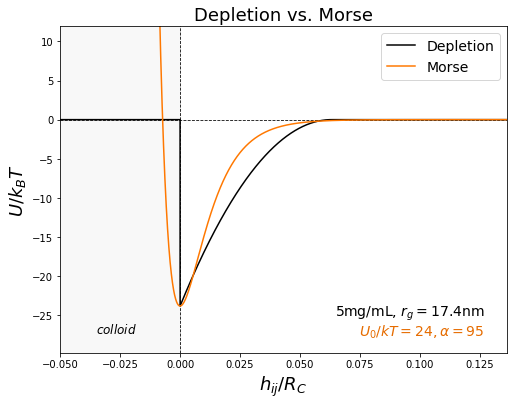

In [3]:
R_C, r_g, D_0, alpha = colloid_morse_calc.morse_calc(c_d, M_d, c_star, eta, rho_s, phi, d_c, rho_c, data_time, dt_Integration, period, sim_eta0, sim_rho, sim_kT)
colloid_morse_calc.plot_morse_v_depletion(R_C, r_g, c_d, M_d, phi, D_0, alpha)